# Question 1 Gradient Discent

In [352]:
import numpy as np
import math
import pylab as pl
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [353]:
def negativeGaussian(x,mu,Sigma):
    detSigma = np.linalg.det(Sigma)
    n = len(x)
    NC = -(1/(np.sqrt(((2*math.pi)**n)*detSigma))) # normalizing constant
    normalizedX = [a - b for a, b in zip(x, mu)] 
    invSigma = np.linalg.inv(Sigma)
    #print (np.inner(np.inner(normalizedX,invSigma),np.transpose(normalizedX)))
    kernel = np.exp(-0.5*(np.inner(np.inner(normalizedX,invSigma),np.transpose(normalizedX))))
    #print kernel
    value = NC*kernel
    
    gradient = [-value*a for a in np.inner(invSigma,normalizedX)]
    
    return(value,gradient)
    

In [354]:
def qBowl(x,b,A):
    quadForm = 0.5*np.inner(np.inner(np.transpose(x),A),x)
    dotForm = np.inner(np.transpose(x),b)
    
    value = quadForm - dotForm
    gradient = [a-b for a,b in zip(np.inner(A,x),b)]
    return (value,gradient)

In [355]:
a = [25,25]
mu = [1,3]
A = [[1,0],[0,1]]


In [356]:
qBowl(a,mu,A)

(525.0, [24, 22])

In [357]:
negativeGaussian([110,110],gaussMean,gaussCov)[1]

[7.2256232377243249e-10, 7.2256232377243249e-10]

In [358]:
1/(np.linalg.norm(negativeGaussian([100,100],gaussMean,gaussCov)[1]))

162632622.24428889

In [359]:
0.5*np.inner(np.inner(np.transpose(a),A),a) - np.inner(np.transpose(a),mu)

525.0

In [436]:
def batchGradientDiscent(function,initGuess,step,threshold,maxIter,*args):
    gradientNorm = []
    epsilon = 1
    errorPropagation = []
    iteration = 0
    #while iteration > 1:
    #if iteration < maxIter:
    while epsilon > threshold and iteration < maxIter : 
        if iteration==0:
            
            value = [float(i) for i in initGuess]
        #print value
        output = function(value,*args)
        
        #print output
        evaluateOld = function(value,*args)[0] # function evaluated at old point
        #print (evaluateOld)
        gradient = [float(i) for i in output[1]]
        #print gradient
        change = [a*step for a in gradient]
        #print change
        newValue = [a - b for a,b in zip(value,change)] #GDS equation
        
        #print newValue
        #print gradient
        
        #print(evaluateOld)
        evaluateNew = function(newValue,*args)[0]# function evaluated at new point
        #print(evaluateNew)
        epsilon = abs(evaluateNew - evaluateOld)
        value = newValue
        gradient= function(value,*args)[1]
        gNorm = np.linalg.norm(gradient)
        gradientNorm.append(gNorm)
        errorPropagation.append(epsilon)
        #print epsilon
        #print value   

        iteration+=1
        #print(iteration)
          
        
        
    return(gradientNorm, errorPropagation,value,iteration)

In [361]:
step = 1/(np.linalg.norm(negativeGaussian([15,10],gaussMean,gaussCov)[1]))

In [362]:
step = 1/(np.linalg.norm(negativeGaussian([15,10],gaussMean,gaussCov)[1]))
A  = batchGradientDiscent(negativeGaussian,[15,10],step,1e-15,130,gaussMean,gaussCov)

In [363]:
# Loading the parameters
def getData():

    # load the parameters for the negative Gaussian function and quadratic bowl function
    # return a tuple that contains parameters for Gaussian mean, Gaussian covariance,
    # A and b for quadratic bowl in order

    data = pl.loadtxt('../DataFiles/HW1/parametersp1.txt')

    gaussMean = data[0,:]
    gaussCov = data[1:3,:]

    quadBowlA = data[3:5,:]
    quadBowlb = data[5,:]

    return (gaussMean,gaussCov,quadBowlA,quadBowlb) 



In [364]:
gaussMean,gaussCov,quadBowlA,quadBowlb = getData()

In [365]:
step = 1/(np.linalg.norm(negativeGaussian([15,10],gaussMean,gaussCov)[1]))
batchGradientDiscent(negativeGaussian,[15,10],step,1e-15,130,gaussMean,gaussCov)

([6.3154713180494556e-07,
  5.0612941154583828e-07,
  4.049013869387108e-07,
  3.2355147051489189e-07,
  2.5835775875233399e-07,
  2.0620435397410093e-07,
  1.6453013832379733e-07,
  1.3125356536479713e-07,
  1.0469466657775076e-07,
  8.3503520762017889e-08,
  6.6598412865622446e-08,
  5.3114063156026697e-08,
  4.2359089727880962e-08,
  3.3781448826630723e-08,
  2.6940550425632615e-08,
  2.1484856472924111e-08,
  1.713393240863856e-08,
  1.3664091190719806e-08,
  1.0896923148314546e-08,
  8.6901378218325667e-09,
  6.9302549459965973e-09,
  5.5267728194852998e-09,
  4.407516248981534e-09,
  3.5149258861799514e-09,
  2.8030986663956077e-09,
  2.2354274192225818e-09,
  1.7827184009513852e-09,
  1.4216900084716208e-09,
  1.1337755029547774e-09,
  9.041681884968541e-10,
  7.2105995083930416e-10,
  5.7503400078856882e-10,
  4.5858059501792195e-10,
  3.6571083019398719e-10,
  2.9164864943990862e-10,
  2.3258522211234422e-10,
  1.8548306542322075e-10,
  1.4791983445057462e-10,
  1.179637470979

In [366]:
step = 1/(np.linalg.norm(qBowl([25,25],quadBowlb,quadBowlA)[1]))
batchGradientDiscent(qBowl,[25,25],step,1e-3,200,quadBowlb,quadBowlA)
print step

0.0282842712475


In [367]:
print np.linalg.norm(quadBowlA)
print quadBowlb

15.8113883008
[ 400.  400.]


In [368]:
A = qBowl([20,0],quadBowlb,quadBowlA)[0]
B = qBowl([20,0],quadBowlb,quadBowlA)[1]
C = B*0.01
print [20,0] - C
qBowl([22,3],quadBowlb,quadBowlA)[0]

TypeError: can't multiply sequence by non-int of type 'float'

In [ ]:
#batchGradientDiscent(qBowl,[26,26],0.001,1e-1,10,quadBowlb,quadBowlA)
#np.linalg.norm()
print SP1
diff = [a-b for a,b in zip(SP1,gaussMean)]
A = -negativeGaussian(SP1,gaussMean,gaussCov)[0]*np.inner(np.linalg.inv(gaussCov),diff)
1/np.linalg.norm(A)
#np.inner(np.linalg.inv(gaussCov),diff)

Quadratic bowl shows some very erratic behavior unless the startiing point is very clos
and the threshold is relatively larger

In [ ]:
# Effect of staritng guess
# Add random noise to the analtyical solution (Close to the solution, a bit far and then very far from the solution)
# For neagtive Gaussain
NGAnalyticSoln = gaussMean
SP1 =NGAnalyticSoln +  np.random.normal(1,1,len(NGAnalyticSoln))
SP2 =NGAnalyticSoln +  np.random.normal(5,1,len(NGAnalyticSoln))
SP3 =NGAnalyticSoln +  np.random.normal(10,1,len(NGAnalyticSoln))

step = 1/(np.linalg.norm(negativeGaussian(SP1,gaussMean,gaussCov)[1]))
SP1output =  batchGradientDiscent(negativeGaussian,SP1,step,1e-10,130,gaussMean,gaussCov)
step = 1/(np.linalg.norm(negativeGaussian(SP2,gaussMean,gaussCov)[1]))
SP2output =  batchGradientDiscent(negativeGaussian,SP2,step,1e-10,130,gaussMean,gaussCov)
step = 1/(np.linalg.norm(negativeGaussian(SP3,gaussMean,gaussCov)[1]))
SP3output =  batchGradientDiscent(negativeGaussian,SP3,step,1e-10,130,gaussMean,gaussCov)

In [ ]:
len(SP1output[1])

In [ ]:
# Image for satring guess plot
plt.plot(SP1output[1])
plt.plot(SP2output[1])
plt.plot(SP3output[1])
#plt.plot(X,Y,'o')
#plt.plot(xtrue,fValue0)
plt.xlabel('x')
plt.ylabel('y')
plt.yscale('log')
plt.title('Linear Regression (M=0)')
#plt.show()


In [ ]:
# Effect of staritng guess
# Add random noise to the analtyical solution (Close to the solution, a bit far and then very far from the solution)
# For Quadratic Bowl
NGAnalyticSoln = np.inner(np.linalg.inv(quadBowlA),quadBowlb)

SP1 =NGAnalyticSoln +  np.random.normal(1,1,len(NGAnalyticSoln))
SP2 =NGAnalyticSoln +  np.random.normal(5,1,len(NGAnalyticSoln))
SP3 =NGAnalyticSoln +  np.random.normal(10,1,len(NGAnalyticSoln))

step = 1/(np.linalg.norm(qBowl(SP1,quadBowlb,quadBowlA)[1]))
SP1output =  batchGradientDiscent(qBowl,SP1,step,1e-10,1000,quadBowlb,quadBowlA)
step = 1/(np.linalg.norm(qBowl(SP2,quadBowlb,quadBowlA)[1]))
SP2output =  batchGradientDiscent(qBowl,SP2,step,1e-10,1000,quadBowlb,quadBowlA)
step = 1/(np.linalg.norm(qBowl(SP3,quadBowlb,quadBowlA)[1]))
SP3output =  batchGradientDiscent(qBowl,SP3,step,1e-10,1000,quadBowlb,quadBowlA)

In [ ]:
# Image for satring guess plot, quadratic Bowl
plt.plot(SP1output[1])
plt.plot(SP2output[1])
plt.plot(SP3output[1])
#plt.plot(X,Y,'o')
#plt.plot(xtrue,fValue0)
plt.xlabel('x')
plt.ylabel('y')
plt.yscale('log')
plt.title('Linear Regression (M=0)')
#plt.show()

# Question 2

In [ ]:
def finiteDifference(function,sp,h,*args):

    fdApprox = []
    for i in range(len(sp)):
        Lower = [float(j) for j in sp]
        Higher = [float(j) for j in sp]
        Lower[i] = Lower[i] - 0.5*h
        #print Lower
        Higher[i] = Higher[i] + 0.5*h
        #print Lower
        #print Higher
        higherValue = function(Higher,*args)[0]
        lowerValue = function(Lower,*args)[0]
        #print higherValue
        #print lowerValue
        fdApprox.append((higherValue - lowerValue)/h)
        #increment = [0.5*h + b for  b in sp]
        #higherInput = [a + b for a, b in zip(sp, increment)] 
        #lowerInput = [a - b for a, b in zip(sp, increment)]
        #higher = function( higherInput,*args)[0]
        #lower = function(lowerInput,*args)[0]
        #fdApprox = (higher - lower)/h
    return(fdApprox)


In [ ]:
finiteDifference(qBowl,[1,2],10000,quadBowlb,quadBowlA)

In [ ]:
qBowl([1,2],quadBowlb,quadBowlA)

In [ ]:
# Finite difference comparison
Sp= [5,7]
Sp2 = [26.66,26.66]
print negativeGaussian(Sp,gaussMean,gaussCov)[1]
h = [1000000,1000,10,1,0.1,0.01,0.001]
NGfiniteDifferenceList = []
QBowlfiniteDifferenceList = []
for i in range(len(h)):
    fdNG = finiteDifference(negativeGaussian,Sp,h[i],gaussMean,gaussCov)
    AnNG = negativeGaussian(Sp,gaussMean,gaussCov)[1]
    NGfiniteDifferenceList.append(np.linalg.norm(np.array(fdNG) -np.array(AnNG)))
    fdQB = finiteDifference(qBowl,Sp2,h[i],quadBowlb,quadBowlA)
    AnQB = qBowl(Sp2,quadBowlb,quadBowlA)[1]
    QBowlfiniteDifferenceList.append(np.linalg.norm(np.array(fdQB) -np.array(AnQB)))
    
    
    
    
print NGfiniteDifferenceList
print  QBowlfiniteDifferenceList

In [ ]:
finiteDifference(qBowl,Sp2,1,quadBowlb,quadBowlA)

In [ ]:
qBowl(Sp2,quadBowlb,quadBowlA)[1]

In [ ]:
# Image for satring guess plot
plt.plot(NGfiniteDifferenceList)
plt.plot( QBowlfiniteDifferenceList)
#plt.plot(SP3output[1])
#plt.plot(X,Y,'o')
#plt.plot(xtrue,fValue0)
plt.xlabel('x')
plt.ylabel('y')
plt.yscale('log')
plt.title('Linear Regression (M=0)')
#plt.show()

# # Data for SGD

In [451]:
# Loading the data

def getData():
    
    # load the fitting data for X and y and return as elements of a tuple
    # X is a 100 by 10 matrix and y is a vector of length 100
    # Each corresponding row for X and y represents a single data sample

    X = pl.loadtxt('../DataFiles/HW1/fittingdatap1_x.txt')
    y = pl.loadtxt('../DataFiles/HW1/fittingdatap1_y.txt')

    return (X,y) 

In [452]:
X,y = getData()

In [453]:
X.shape

(100, 10)

In [454]:
A = np.dot(np.linalg.inv(np.dot(np.transpose(X),X)),np.transpose(X))

In [455]:
trueSp = np.inner(A,y)
trueSp

array([  0.5032541 ,  -2.3367948 ,  -6.31670032,   6.81230107,
        -1.06337989,   6.67469398,   3.4118044 ,  -0.45573592,
       -12.94593466,  15.73289812])

Least Square function

In [456]:
def leastSquare(theta,X,y):
    #y = y.ravel()
    intermediate = np.inner(X,theta) - y
    value = np.inner(np.transpose(intermediate),intermediate)
    gradient = 2*np.inner(np.transpose(X),intermediate)
        
    return(value,gradient)


In [457]:
theta = [1,2,3,4,-5,6,7,8,9,-10]

In [458]:
intermediate=  np.inner(X[1,],trueSp) - y[1]
value = np.inner(np.transpose(intermediate),intermediate)
gradient = 2*np.inner(np.transpose(X[1,]),intermediate)
print gradient 
leastSquare(trueSp,X[1,],y[1])

[  8.35941938e-01   1.10289025e+03   1.02008172e+03  -1.26978323e+02
   8.43653974e+02   4.88648917e+02  -4.28681082e+02   1.83080712e+02
   6.27547270e+02  -6.35061319e+02]


(246.90447611861788,
 array([  8.35941938e-01,   1.10289025e+03,   1.02008172e+03,
         -1.26978323e+02,   8.43653974e+02,   4.88648917e+02,
         -4.28681082e+02,   1.83080712e+02,   6.27547270e+02,
         -6.35061319e+02]))

In [459]:
print np.linalg.norm((leastSquare(trueSp,X,y)[1]))
print leastSquare(trueSp,X,y)[1]

8.08898029578e-10
[  7.22795585e-11   3.46213943e-11   7.47740492e-11  -3.55712868e-11
   2.15244461e-11  -1.43022159e-10   8.23569515e-12   6.10197803e-11
  -6.08653302e-10  -4.95850632e-10]


In [460]:
sp = [0.1]*10

In [461]:
step = 1/np.linalg.norm(leastSquare(sp,X,y)[1])
print step

5.43333039369e-07


In [462]:
batchGradientDiscent(leastSquare,[0.1]*10,step,1e-19,1000,X,y)

([1757133.2780891694,
  1677875.3507771338,
  1602502.6990951814,
  1530811.8774039475,
  1462610.6298304147,
  1397717.2530206023,
  1335959.9961464857,
  1277176.4959310552,
  1221213.2445944331,
  1167925.0887538954,
  1117174.7574321893,
  1068832.4174421981,
  1022775.2545223556,
  978887.0786967359,
  937057.95242691913,
  897183.84020994115,
  859166.27835834154,
  822912.06377483637,
  788332.96060584346,
  755345.42372528778,
  723870.33806309151,
  693832.77285182965,
  665161.74992041942,
  637790.02521566302,
  611653.88278123515,
  586692.9404694495,
  562849.96670409327,
  540070.70765295776,
  518303.7242065458,
  497500.23819503153,
  477613.98730895523,
  458601.08822054818,
  440419.90743209986,
  423030.9394055226,
  406396.69155336072,
  390481.57569602109,
  375251.80561307038,
  360675.30033815478,
  346721.59286750644,
  333361.7439712176,
  320568.26081453956,
  308315.0201134776,
  296577.1955649663,
  285331.18930698751,
  274554.56717818062,
  264225.99755986

In [463]:
trueSp


array([  0.5032541 ,  -2.3367948 ,  -6.31670032,   6.81230107,
        -1.06337989,   6.67469398,   3.4118044 ,  -0.45573592,
       -12.94593466,  15.73289812])

In [464]:
a

15.732898120720392

# Stochastic Gradient Discent

In [489]:
#function,initGuess,step,threshold,maxIter,*args
def stochasticGradientDiscent(function,initGuess,threshold,maxIter,tau0,kappa,*args):
    gradientNorm = []
    epsilon = 1
    k = kappa
    
    steps = 0
    iteration = 0
    X = args[0]
    Y = args[1]
    n = X.shape[0]
    print n
    print maxIter 
    #j = 0
    for j in range(maxIter): 
        
        for i in range(n):
            #print i
            if epsilon > threshold:
                
                indX = X[i,]
                indY = Y[i]
                
                if steps ==0:
                    indTheta = initGuess
                #intermediate = np.inner(indX,indTheta) - y
                output = function(indTheta,indX,indY)
                #print indTheta
                
                
                #print indTheta
                value = output[0]
                gradient = output[1]
                #print gradient
                etaT = (1./((tau0+steps)*np.linalg.norm(gradient)))**k
                #print etaT
                #print 1./((tau0+steps)*np.linalg.norm(gradient))**k
                change = [a*etaT for a in gradient]
                #print change
                newTheta = [a - b for a,b in zip(indTheta,change)] #GDS equation
                #print newTheta
                newValue = function(newTheta,indX,indY)[0]
                #epsilon = abs(function(indTheta,X,Y)[0] - function(newTheta,X,Y)[0])
                #epsilon = np.linalg.norm(function(newTheta,X,Y)[1])
                epsilon = np.linalg.norm([a - b for a,b in zip(indTheta,newTheta)])
                print(epsilon)
                steps= steps +1            
                indTheta = newTheta
                gradientNorm.append(np.linalg.norm(gradient))
                print steps
            else:
                print "SGD converged"
                break
                
        #j = j + 1  
        #print iteration   
    return(indTheta,gradientNorm)

In [490]:
print trueSp
u = np.linalg.norm(leastSquare(trueSp,X[0,],y[0])[1])
etaT = (1./((3+1)*u))**0.9
print etaT
change = [a*etaT for a in leastSquare(trueSp,X[0,],y[0])[1]]
#print change
newTheta = [a - b for a,b in zip(trueSp,change)] 
print newTheta

[  0.5032541   -2.3367948   -6.31670032   6.81230107  -1.06337989
   6.67469398   3.4118044   -0.45573592 -12.94593466  15.73289812]
0.00122343556783
[0.50523402873435064, -2.343388292374375, -6.0116980275107545, 6.613693208727395, -1.2085457381358331, 6.9079533389224066, 3.513780302196865, -0.23336081051615284, -12.855581450315805, 15.695879316382005]


In [491]:
trueSp

array([  0.5032541 ,  -2.3367948 ,  -6.31670032,   6.81230107,
        -1.06337989,   6.67469398,   3.4118044 ,  -0.45573592,
       -12.94593466,  15.73289812])

In [493]:
stochasticGradientDiscent(leastSquare,trueSp,1e-3,30,5,0.9,X,y)

100
30
0.430847023248
1
0.449786470841
2
0.30279571763
3
0.307355815122
4
0.248807300171
5
0.285462591368
6
0.235387174941
7
0.213567442887
8
0.202197467271
9
0.204223598907
10
0.180599687214
11
0.180913656618
12
0.154221704474
13
0.145096293431
14
0.152624184875
15
0.142841954854
16
0.132664561927
17
0.136069575169
18
0.13403070215
19
0.0945781690029
20
0.116186497032
21
0.106103824565
22
0.104830169134
23
0.108150417597
24
0.0955030101264
25
0.100030638241
26
0.0919601662246
27
0.100224051727
28
0.0814850855578
29
0.0895254631983
30
0.0883893035788
31
0.0659028694299
32
0.0842698061972
33
0.0600194568886
34
0.0797846919507
35
0.0625492582517
36
0.0682907468499
37
0.0652929127615
38
0.0632956267625
39
0.062735778892
40
0.0649665332591
41
0.0580336777299
42
0.058350811259
43
0.0569428581898
44
0.0679727430077
45
0.0604667335132
46
0.0552379309294
47
0.0440803273033
48
0.062914615384
49
0.0590586240783
50
0.0505687568506
51
0.0579318740184
52
0.0424842021295
53
0.0551100592253
54
0.0372

([0.51451444280998804,
  -2.3206895061216399,
  -6.301417912799252,
  6.7485430755234805,
  -1.0581035301523445,
  6.7373799549014439,
  3.4582443622662988,
  -0.45038746806517499,
  -12.971542959625188,
  15.744054342070175],
 [430.48795676562418,
  3415.2707187934247,
  261.44458280395691,
  1009.7740975283776,
  352.21980466904847,
  3593.2880992819082,
  1231.29504792232,
  1018.5484490441852,
  1211.2876348313937,
  2607.4234879494429,
  1419.0289953898539,
  2581.0318303280424,
  902.59989617125348,
  820.38125521777272,
  2213.1761612451487,
  1810.6220779430614,
  1341.2907369659279,
  2626.7238410446421,
  3369.7171760882111,
  151.28999038111385,
  1710.0809118249506,
  981.90736412164756,
  1222.1844177271,
  2315.8172741679323,
  915.69866886698765,
  1974.3388461880559,
  1143.5435816374372,
  3598.0679713361114,
  598.97227134786226,
  2008.0569259322842,
  2294.0850785239213,
  156.95160096696696,
  2347.1209395689416,
  100.22428845553975,
  2181.6103679462999,
  240.30

In [ ]:
len(A[1])

In [ ]:
a = np.inner(X[0,],sp) - y[0]
print X[0,]
nu = np.linalg.norm(2*np.transpose(X[0,])*a)
eta = (1./((2+1)*nu))**0.9
print sp - eta*nu
print sp

In [ ]:
step = 1/np.linalg.norm(leastSquare(sp,X[1,],y[1])[1])
print step
print trueSp

In [ ]:
np.linalg.norm(leastSquare([0.50034016052490493, -2.319209537499022, -6.3299194407028789, 6.8037412098861694, -1.062374491272561, 6.6702575834680333, 3.4242693800619417, -0.44371814359307221, -12.951667951630881, 15.737072262969543],X[80,],y[80])[1])

In [ ]:
stochasticGradientDiscent(leastSquare,trueSp,1e-4,3,3,0.9,X,y)

In [ ]:
i = 1
indTheta = sp
indX = X[i,]
indY = y[i]
value = (np.inner(np.transpose(indX),indTheta) - indY)**2
gradient = 2*(np.inner(np.transpose(indX),indTheta) - indY)*indX
#print value,gradient
#print np.linalg.norm(gradient)
tau0 = 2
k = 0.8
j = 1
etaT = (1./(tau0+(j+1)))**k
print etaT
newTheta = indTheta - etaT*gradient
#print gradient
#print etaT*gradient
print newTheta
print np.inner(np.transpose(indX),indTheta) - indY
#2*(np.inner(np.transpose(indX),newTheta) - indY)*indX

In [ ]:
sp

In [ ]:
J = 0
while J < 3:
    for i in range(2):
        print "cdcw"
    J = J + 1

In [ ]:
sp

In [ ]:
indX = X[i,]
indY = y[i]
value = (np.inner(np.transpose(indX),sp) - indY)**2
value
2*(np.inner(np.transpose(indX),sp) - indY)*indX

In [ ]:
def additional(function,f,d,*args):
    return(function(*args)+f**d)


In [ ]:
add(23,31)

In [ ]:
additional(mult,23,2,12,3)

In [ ]:
23**2

In [ ]:
abs(23-132)

In [ ]:
 x = np.arange(30).reshape(6,5)

In [ ]:
x[:,1]

In [ ]:
data = pl.loadtxt('../DataFiles/HW1/curvefittingp2.txt')

## Linear Basis Function Regression

In [369]:
# Data for question 2
import matplotlib.pyplot as plt
import pylab as pl

def getData(ifPlotData=True):
    # load the fitting data and (optionally) plot out for examination
    # return the X and Y as a tuple

    data = pl.loadtxt('../DataFiles/HW1/curvefittingp2.txt')

    X = data[0,:]
    Y = data[1,:]

    if ifPlotData:
        plt.plot(X,Y,'o')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()

    return (X,Y)

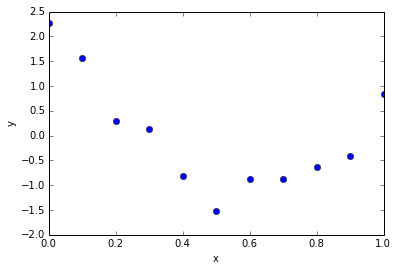

In [370]:
X,Y = getData(ifPlotData=True)


In [371]:
X

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])

In [372]:
def LBFRegression(X,y,m):
    designMat = np.zeros((len(X),m+1))
    for i in range(m+1):
        #print([a**i for a in X])
        designMat[:,i] = [a**i for a in X]
        
        
    mle = np.inner(np.dot(np.linalg.inv(np.dot(np.transpose(designMat),designMat)),np.transpose(designMat)),y)
    fittedValues = np.dot(designMat,np.transpose(mle))
    return(mle,fittedValues)

### 2.1

In [373]:
xtrue = np.linspace(0,1,100) # 100 linearly spaced numbers
ytrue = np.cos(np.pi*xtrue)+1.5*np.cos(2*np.pi*xtrue) # computing the values of sin(x)/x
noise = np.random.normal(0,0.01,100)
ytrue = ytrue+noise


weights0 = LBFRegression(X,Y,0)[0]
m = 0
designMat = np.zeros((len(xtrue),m+1))
for i in range(m+1):
    designMat[:,i] = [a**i for a in xtrue]


fValue0 = np.inner(designMat,np.transpose(weights0))

weights1 = LBFRegression(X,Y,1)[0]
m = 1
designMat = np.zeros((len(xtrue),m+1))
for i in range(m+1):
    designMat[:,i] = [a**i for a in xtrue]


fValue1 = np.inner(designMat,np.transpose(weights1))



weights3 = LBFRegression(X,Y,3)[0]
m = 3
designMat = np.zeros((len(xtrue),m+1))
for i in range(m+1):
    designMat[:,i] = [a**i for a in xtrue]


fValue3 = np.inner(designMat,np.transpose(weights3))



weights10 = LBFRegression(X,Y,10)[0]
m = 10
designMat = np.zeros((len(xtrue),m+1))
for i in range(m+1):
    designMat[:,i] = [a**i for a in xtrue]

weights10 = LBFRegression(X,Y,10)[0]
fValue10 = np.inner(designMat,np.transpose(weights10))

In [374]:
fValue10


array([ 2.28013448,  1.79391397,  1.58741861,  1.5457288 ,  1.58651516,
        1.65331598,  1.70983853,  1.73517068,  1.71979784,  1.6623286 ,
        1.56684075,  1.44076631,  1.293242  ,  1.13385782,  0.97174315,
        0.81493557,  0.66998334,  0.54173782,  0.43329704,  0.34606615,
        0.27990509,  0.23333752,  0.20379884,  0.18790481,  0.18172494,
        0.18104813,  0.1816304 ,  0.17941703,  0.17073339,  0.15244098,
        0.1220563 ,  0.07783235,  0.01880309, -0.05520715, -0.14360672,
       -0.24508887, -0.3577091 , -0.47898339, -0.60600257, -0.73555824,
       -0.86427529, -0.9887464 , -1.10566406, -1.21194574, -1.30484852,
       -1.38206954, -1.44182946, -1.48293648, -1.50482898, -1.50759572,
       -1.49197285, -1.45931786, -1.41156108, -1.35113614, -1.28089117,
       -1.20398342, -1.1237602 , -1.04362973, -0.96692591, -0.89677134,
       -0.83594315, -0.78674658, -0.7509011 , -0.7294441 , -0.72265688,
       -0.7300174 , -0.75018398, -0.7810136 , -0.81961741, -0.86

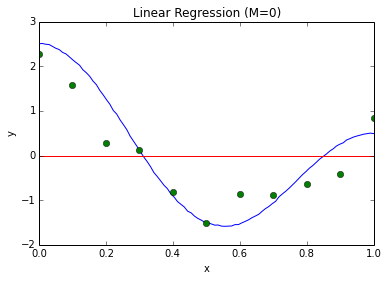

In [375]:
from pylab import savefig

plt.plot(xtrue,ytrue)
plt.plot(X,Y,'o')
plt.plot(xtrue,fValue0)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression (M=0)')
#plt.show()
pl.savefig('../ImageFiles/HW1/PolyBasis0.pdf')

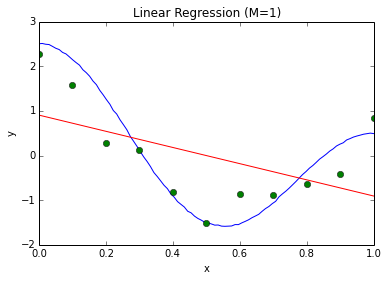

In [376]:
plt.plot(xtrue,ytrue)
plt.plot(X,Y,'o')
plt.plot(xtrue,fValue1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression (M=1)')
#plt.show()
pl.savefig('../ImageFiles/HW1/PolyBasis1.pdf')

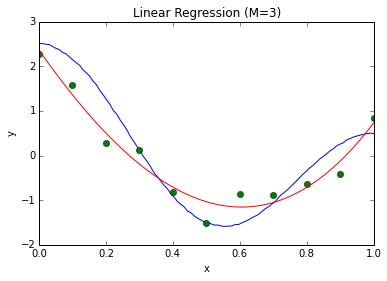

In [377]:
plt.plot(xtrue,ytrue)
plt.plot(X,Y,'o')
plt.plot(xtrue,fValue3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression (M=3)')
#plt.show()
pl.savefig('../ImageFiles/HW1/PolyBasis3.pdf')

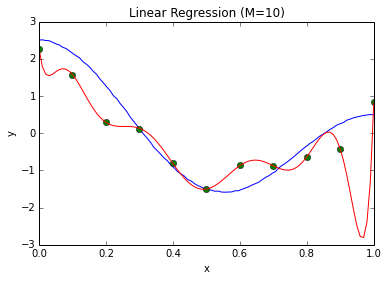

In [378]:
plt.plot(xtrue,ytrue)
plt.plot(X,Y,'o')
plt.plot(xtrue,fValue10)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression (M=10)')
#plt.show()
pl.savefig('../ImageFiles/HW1/PolyBasis10.pdf')

# SSE

In [423]:
def SSEPolynomialBasis(weight,X,y):
    error = np.inner(X,np.transpose(weight)) - y
    SSE =np.inner(error,np.transpose(error))
    SSEderivative = 2*np.inner(np.transpose(X),error)
    return(SSE,SSEderivative)

In [429]:
weights0 = LBFRegression(X,Y,0)[0]
print weights0
m = 0
designMat = np.zeros((len(X),m+1))
for i in range(m+1):
    designMat[:,i] = [a**i for a in X]
designMat
SSEPolynomialBasis(weights0,designMat,Y)

[-0.00087273]


(13.476960001818181, array([ -6.66133815e-16]))

In [425]:
np.linalg.norm(SSEPolynomialBasis(weights0,designMat,Y)[1])

6.6613381477509392e-16

In [426]:
finiteDifference(SSEPolynomialBasis,weights0,0.02,designMat,Y)

[8.8817841970012523e-14]

In [440]:
Sp = [10]
step = 1/np.linalg.norm(SSEPolynomialBasis(Sp,designMat,Y)[1])
print step
batchGradientDiscent(SSEPolynomialBasis,Sp,step,0.00000001,1000,designMat,Y)

0.00454505788586


([198.01919999999998,
  178.21900801675491,
  160.39866244523839,
  144.36019592142935,
  129.92543609014442,
  116.93402627689551,
  105.24164407528902,
  94.71839806013962,
  85.247384815281578,
  76.72339024600673,
  69.051720748925803,
  62.147151254643632,
  55.932978456987065,
  50.340168711048008,
  45.306591133986302,
  40.776327389059958,
  36.699050485229208,
  33.029465691379201,
  29.726807354241611,
  26.754386030133006,
  24.079180899567469,
  21.671472936851103,
  19.504514759516013,
  17.554233489929757,
  15.798963328150897,
  14.219204865165304,
  12.797408462698442,
  11.517779293156122,
  10.36610187386983,
  9.3295821463863362,
  8.3967053464502417,
  7.5571080857479718,
  6.8014632243610791,
  6.1213762549695714,
  5.5092920477307015,
  4.9584109198560631,
  4.4626130974985898,
  4.0163907307916444,
  3.6147867067909374,
  3.253339580588313,
  2.9280340128335762,
  2.6352561630716531,
  2.3717535433567525,
  2.1345988861547962,
  1.9211576251402784,
  1.7290586276

In [408]:
weights1 = LBFRegression(X,Y,1)[0]
m = 1
designMat = np.zeros((len(X),m+1))
for i in range(m+1):
    designMat[:,i] = [a**i for a in X]
designMat
SSEPolynomialBasis(weights1,designMat,Y)

(9.8619830089999994, array([  0.00000000e+00,   4.44089210e-16]))

In [409]:
np.linalg.norm(SSEPolynomialBasis(weights1,designMat,Y)[1])

4.4408920985006262e-16

In [410]:
np.linalg.norm(finiteDifference(SSEPolynomialBasis,weights1,0.02,designMat,Y))

0.0

In [403]:
weights3 = LBFRegression(X,Y,3)[0]
m = 3
designMat = np.zeros((len(X),m+1))
for i in range(m+1):
    designMat[:,i] = [a**i for a in X]

SSEPolynomialBasis(weights3,designMat,Y)

(0.65484574996503375,
 array([  2.72337708e-13,   1.61315405e-13,   1.19598775e-13,
          1.04971587e-13]))

In [404]:
np.linalg.norm(SSEPolynomialBasis(weights3,designMat,Y)[1])

3.5427868739665491e-13

In [407]:
np.linalg.norm(finiteDifference(SSEPolynomialBasis,weights3,0.02,designMat,Y))

3.1646225226420966e-13

In [396]:
weights10 = LBFRegression(X,Y,10)[0]
m = 10
designMat = np.zeros((len(X),m+1))
for i in range(m+1):
    designMat[:,i] = [a**i for a in X]


SSEPolynomialBasis(weights10,designMat,Y)

(0.0011636150697689452,
 array([-0.04220659, -0.07631585, -0.0785371 , -0.07655327, -0.07378075,
        -0.07106037, -0.06860579, -0.06645134, -0.06457771, -0.06295159,
        -0.0615389 ]))

In [394]:
np.linalg.norm(SSEPolynomialBasis(weights10,designMat,Y)[1])

0.22620768249878792

In [402]:
np.linalg.norm(finiteDifference(SSEPolynomialBasis,weights10,0.5,designMat,Y))

0.22620768254986937

In [ ]:
weight3high = weights3+0.2
weight3Low = weights3-0.2
a = SSEPolynomialBasis(weight3high,designMat,ytrue)[0]
b = SSEPolynomialBasis(weight3Low,designMat,ytrue)[0]
print a,b

Numerical derviative for the SSE

In [401]:
np.linalg.norm(finiteDifference(SSEPolynomialBasis,weights10,0.5,designMat,Y))

0.22620768254986934

In [417]:
batchGradientDiscent(SSEPolynomialBasis,weights0,0.001,0.01,100,designMat,Y)

([2.2204460492503131e-16], [0.0], [-0.000872727272727301])

# 2.3 Cosine basis function

In [441]:
def CosBFRegression(X,y,m):
    designMat = np.zeros((len(X),m))
    for i in range(1,m+1):
        
        #print np.cos(i*np.pi*X)
        designMat[:,i-1] = np.cos(i*np.pi*X)
        
        
    mle = np.inner(np.dot(np.linalg.inv(np.dot(np.transpose(designMat),designMat)),np.transpose(designMat)),y)
    fittedValues = np.dot(designMat,np.transpose(mle))
    return(mle)

In [442]:
Y

array([ 2.2748,  1.5728,  0.2885,  0.1237, -0.81  , -1.5123, -0.8655,
       -0.8766, -0.6274, -0.4159,  0.8383])

In [443]:
cosBasis1 = np.append(CosBFRegression(X,Y,1),[0]*7)
cosBasis2 = np.append(CosBFRegression(X,Y,2),[0]*6)
cosBasis3 = np.append(CosBFRegression(X,Y,3),[0]*5)
cosBasis4 = np.append(CosBFRegression(X,Y,4),[0]*4)
cosBasis5 = np.append(CosBFRegression(X,Y,5),[0]*3)
cosBasis6 = np.append(CosBFRegression(X,Y,6),[0]*2)
cosBasis7 = np.append(CosBFRegression(X,Y,7),[0]*1)
cosBasis8 = np.append(CosBFRegression(X,Y,8),[0]*0)

In [444]:
TrueCosBasis = np.array([1,1.5,0,0,0,0,0,0])
def euclideanDistanceTrueCos(Vector):
    return np.linalg.norm(TrueCosBasis - Vector)
    
EuclideanDistance = [euclideanDistanceTrueCos(cosBasis1),euclideanDistanceTrueCos(cosBasis2),euclideanDistanceTrueCos(cosBasis3),euclideanDistanceTrueCos(cosBasis4),
                    euclideanDistanceTrueCos(cosBasis5),euclideanDistanceTrueCos(cosBasis6),euclideanDistanceTrueCos(cosBasis7),euclideanDistanceTrueCos(cosBasis8)]
EuclideanDistance 
MVector = range(1,9)
MVector

[1, 2, 3, 4, 5, 6, 7, 8]

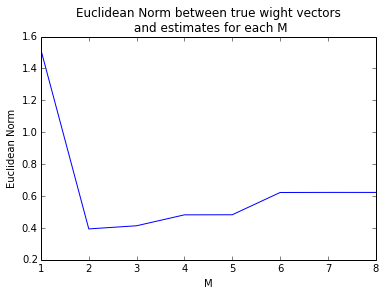

In [447]:
plt.plot(MVector,EuclideanDistance)

plt.xlabel('M')
plt.ylabel('Euclidean Norm')
plt.title('Euclidean Norm between true wight vectors\n and estimates for each M')

#plt.show()
pl.savefig('../ImageFiles/HW1/CosBasisDifference.pdf')

In [ ]:
np.cos(4*np.pi*X)

# Ridge Regression 

In [ ]:
# Data for question 3

import pdb
import random
import pylab as pl

# X is an array of N data points (one dimensional for now), that is, NX1
# Y is a Nx1 column vector of data values

def getData(name):
    data = pl.loadtxt(name)
    # Returns column matrices
    X = data[0:1].T
    Y = data[1:2].T
    return X, Y

def regressAData():
    return getData('../DataFiles/HW1/regressA_train.txt')

def regressBData():
    return getData('../DataFiles/HW1/regressB_train.txt')

def validateData():
    return getData('../DataFiles/HW1/regress_validate.txt')

In [ ]:
def ridgeRegression(X,y,lambdaShrink,m):
    designMat = np.zeros((len(X),m+1))
    for i in range(m+1):
        #print([a**i for a in X])
        designMat[:,i] = [a**i for a in X]
        designMat[:,i] = [j - np.mean(y) for j in designMat[:,i]] # Centering X's
        
    y = y.ravel() 
    
    yCentered = [j - np.mean(y) for j in y] # Centering y's
    
    mle = np.inner(np.dot(np.linalg.inv(np.dot(np.transpose(designMat),designMat)+lambdaShrink*np.identity(m+1)),np.transpose(designMat)),yCentered)
    fittedValues = np.dot(designMat,np.transpose(mle))
    return(mle,fittedValues)
    

Ridge regression fit for M = 1 for various lamdas

In [ ]:
RRLambda0_1M1 = ridgeRegression(X,Y,0.1,1)[0]
RRLambda0_5M1 = ridgeRegression(X,Y,0.5,1)[0]
RRLambda1M1 = ridgeRegression(X,Y,1,1)[0]
RRLambda2M1 = ridgeRegression(X,Y,2,1)[0]
RRLambda5M1 = ridgeRegression(X,Y,5,1)[0]
W1 = ['w0','w1']
RRLambda2M1

In [ ]:
#plt.bar(range(len(t12)), t12, align='center')
#plt.xticks(range(len(t12)), t11, size='small')
#plt.show()
plt.plot(range(len(RRLambda0_1M1)),RRLambda0_1M1,label='$\lambda$ = 0.1')
plt.plot(range(len(RRLambda0_5M1)),RRLambda0_5M1,label='$\lambda$ = 0.5')
plt.plot(range(len(RRLambda1M1)),RRLambda1M1,label='$\lambda$ = 1')
plt.plot(range(len(RRLambda2M1)),RRLambda2M1,label='$\lambda$ = 2')
plt.plot(range(len(RRLambda5M1)),RRLambda5M1,label='$\lambda$ = 5')
plt.xticks(range(len(W1)),W1, size='small')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Ridge regression fit for M = 3 for various lamdas

In [ ]:
RRLambda0_1M3 = ridgeRegression(X,Y,0.1,3)[0]
RRLambda0_5M3 = ridgeRegression(X,Y,0.5,3)[0]
RRLambda1M3 = ridgeRegression(X,Y,1,3)[0]
RRLambda2M3 = ridgeRegression(X,Y,2,3)[0]
RRLambda5M3 = ridgeRegression(X,Y,5,3)[0]
W1 = ['w0','w1','w2','w3']
RRLambda2M1

In [ ]:
# Adding label to the plot
plt.plot(range(len(RRLambda0_1M3)),RRLambda0_1M3,label='$\lambda$ = 0.1')
plt.plot(range(len(RRLambda0_5M3)),RRLambda0_5M3,label='$\lambda$ = 0.5')
plt.plot(range(len(RRLambda1M3)),RRLambda1M3,label='$\lambda$ = 1')
plt.plot(range(len(RRLambda2M3)),RRLambda2M3,label='$\lambda$ =2')
plt.plot(range(len(RRLambda5M3)),RRLambda5M3,label='$\lambda$ = 5')
plt.xticks(range(len(W1)),W1, size='small')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Ridge regression fit for M = 5 for various lamdas

In [ ]:
RRLambda0_1M5 = ridgeRegression(X,Y,0.1,5)[0]
RRLambda0_5M5 = ridgeRegression(X,Y,0.5,5)[0]
RRLambda1M5 = ridgeRegression(X,Y,1,5)[0]
RRLambda2M5 = ridgeRegression(X,Y,2,5)[0]
RRLambda5M5 = ridgeRegression(X,Y,5,5)[0]
W1 = ['w0','w1','w2','w3','w4','w5']
RRLambda2M1

In [ ]:
# Adding label to the plot
plt.plot(range(len(RRLambda0_1M5)),RRLambda0_1M5,label='$\lambda$ = 0.1')
plt.plot(range(len(RRLambda0_5M5)),RRLambda0_5M5,label='$\lambda$ = 0.5')
plt.plot(range(len(RRLambda1M5)),RRLambda1M5,label='$\lambda$ = 1')
plt.plot(range(len(RRLambda2M5)),RRLambda2M5,label='$\lambda$ =2')
plt.plot(range(len(RRLambda5M5)),RRLambda5M5,label='$\lambda$ = 5')
plt.xticks(range(len(W1)),W1, size='small')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Ridge regression fit for M = 10 for various lamdas

In [ ]:
RRLambda0_1M10 = ridgeRegression(X,Y,0.1,10)[0]
RRLambda0_5M10 = ridgeRegression(X,Y,0.5,10)[0]
RRLambda1M10 = ridgeRegression(X,Y,1,10)[0]
RRLambda2M10 = ridgeRegression(X,Y,2,10)[0]
RRLambda5M10 = ridgeRegression(X,Y,5,10)[0]
W1 = ['w0','w1','w2','w3','w4','w5','w6','w7','w8','w9','w10']
RRLambda2M1

In [ ]:
# Adding label to the plot
plt.plot(range(len(RRLambda0_1M10)),RRLambda0_1M10,label='$\lambda$ = 0.1')
plt.plot(range(len(RRLambda0_5M10)),RRLambda0_5M10,label='$\lambda$ = 0.5')
plt.plot(range(len(RRLambda1M10)),RRLambda1M10,label='$\lambda$ = 1')
plt.plot(range(len(RRLambda2M10)),RRLambda2M10,label='$\lambda$ =2')
plt.plot(range(len(RRLambda5M10)),RRLambda5M10,label='$\lambda$ = 5')
plt.xticks(range(len(W1)),W1, size='small')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Test 1

In [ ]:
Train1_X = regressAData()[0]
Train1_Y = regressAData()[1]
Test1_X = regressBData()[0]
Test1_Y = regressBData()[1]
valid1_X =validateData()[0]
valid1_Y = validateData()[1]

In [ ]:
def LBFRidgeRegression(theta,X,y,lambda_shrinkage):
    params = len(theta)
    #print (m)
    designMat = np.zeros((len(X),params))
    for i in range(params):
        #print([a**i for a in X])
        designMat[:,i] = [a**i for a in X]
        #designMatTemp[:,i] = [a**i for a in X]
        designMat[:,i] = [j - np.mean(y) for j in designMat[:,i]] # Centering X's
    
    y = y.ravel() 
    yCentered = [j - np.mean(y) for j in y]  # Centering y's
    
    
    fittedValues = np.dot(designMat,np.transpose(theta))
    fittedDifference = [a - b for a, b in zip(fittedValues,yCentered)]
    RSS = sum(a**2 for a in fittedDifference)+lambda_shrinkage*np.dot(theta,np.transpose(theta))
    return(fittedValues,RSS)

In [ ]:
# Lambdas to be tested are 0.1,0.5,1,2,3,5 and the M's are 1,3,5,10
ridgeParam = ridgeRegression(valid1_X,valid1_Y,0.6,1)[0]

#ridgeParam

In [ ]:
LBFRidgeRegression(ridgeParam,valid1_X,valid1_Y,1)[1]

M =  1

In [ ]:
ridgeParamLambda0_1M1 = ridgeRegression(Train1_X,Train1_Y,0.1,1)[0]
ridgeParamLambda0_5M1 = ridgeRegression(Train1_X,Train1_Y,0.5,1)[0]
ridgeParamLambda1M1 = ridgeRegression(Train1_X,Train1_Y,1,1)[0]
ridgeParamLambda2M1 = ridgeRegression(Train1_X,Train1_Y,2,1)[0]
ridgeParamLambda5M1 = ridgeRegression(Train1_X,Train1_Y,5,1)[0]

In [ ]:
errorLambda0_1M1 = LBFRidgeRegression(ridgeParamLambda0_1M1,valid1_X ,valid1_Y,0.1)[1]
errorLambda0_5M1 = LBFRidgeRegression(ridgeParamLambda0_5M1,valid1_X ,valid1_Y,0.5)[1]
errorLambda1M1 = LBFRidgeRegression(ridgeParamLambda1M1,valid1_X ,valid1_Y,1)[1]
errorLambda2M1 = LBFRidgeRegression(ridgeParamLambda2M1,valid1_X ,valid1_Y,2)[1]
errorLambda5M1 = LBFRidgeRegression(ridgeParamLambda5M1,valid1_X ,valid1_Y,5)[1]


M = 3

In [ ]:
ridgeParamLambda0_1M3 = ridgeRegression(Train1_X,Train1_Y,0.1,3)[0]
ridgeParamLambda0_5M3 = ridgeRegression(Train1_X,Train1_Y,0.5,3)[0]
ridgeParamLambda1M3 = ridgeRegression(Train1_X,Train1_Y,1,3)[0]
ridgeParamLambda2M3 = ridgeRegression(Train1_X,Train1_Y,2,3)[0]
ridgeParamLambda5M3 = ridgeRegression(Train1_X,Train1_Y,5,3)[0]

In [ ]:
errorLambda0_1M3 = LBFRidgeRegression(ridgeParamLambda0_1M3,valid1_X ,valid1_Y,0.1)[1]
errorLambda0_5M3 = LBFRidgeRegression(ridgeParamLambda0_5M3,valid1_X ,valid1_Y,0.5)[1]
errorLambda1M3 = LBFRidgeRegression(ridgeParamLambda1M3,valid1_X ,valid1_Y,1)[1]
errorLambda2M3 = LBFRidgeRegression(ridgeParamLambda2M3,valid1_X ,valid1_Y,2)[1]
errorLambda5M3 = LBFRidgeRegression(ridgeParamLambda5M3,valid1_X ,valid1_Y,5)[1]

M = 5

In [ ]:
ridgeParamLambda0_1M5 = ridgeRegression(Train1_X,Train1_Y,0.1,5)[0]
ridgeParamLambda0_5M5 = ridgeRegression(Train1_X,Train1_Y,0.5,5)[0]
ridgeParamLambda1M5 = ridgeRegression(Train1_X,Train1_Y,1,5)[0]
ridgeParamLambda2M5 = ridgeRegression(Train1_X,Train1_Y,2,5)[0]
ridgeParamLambda5M5 = ridgeRegression(Train1_X,Train1_Y,5,5)[0]

In [ ]:
errorLambda0_1M5 = LBFRidgeRegression(ridgeParamLambda0_1M5,valid1_X ,valid1_Y,0.1)[1]
errorLambda0_5M5 = LBFRidgeRegression(ridgeParamLambda0_5M5,valid1_X ,valid1_Y,0.5)[1]
errorLambda1M5 = LBFRidgeRegression(ridgeParamLambda1M5,valid1_X ,valid1_Y,1)[1]
errorLambda2M5 = LBFRidgeRegression(ridgeParamLambda2M5,valid1_X ,valid1_Y,2)[1]
errorLambda5M5 = LBFRidgeRegression(ridgeParamLambda5M5,valid1_X ,valid1_Y,5)[1]

M = 10

In [ ]:
ridgeParamLambda0_1M10 = ridgeRegression(Train1_X,Train1_Y,0.1,10)[0]
ridgeParamLambda0_5M10 = ridgeRegression(Train1_X,Train1_Y,0.5,10)[0]
ridgeParamLambda1M10 = ridgeRegression(Train1_X,Train1_Y,1,10)[0]
ridgeParamLambda2M10 = ridgeRegression(Train1_X,Train1_Y,2,10)[0]
ridgeParamLambda5M10 = ridgeRegression(Train1_X,Train1_Y,5,10)[0]

In [ ]:
errorLambda0_1M10 = LBFRidgeRegression(ridgeParamLambda0_1M10,valid1_X ,valid1_Y,0.1)[1]
errorLambda0_5M10 = LBFRidgeRegression(ridgeParamLambda0_5M10,valid1_X ,valid1_Y,0.5)[1]
errorLambda1M10 = LBFRidgeRegression(ridgeParamLambda1M10,valid1_X ,valid1_Y,1)[1]
errorLambda2M10 = LBFRidgeRegression(ridgeParamLambda2M10,valid1_X ,valid1_Y,2)[1]
errorLambda5M10 = LBFRidgeRegression(ridgeParamLambda5M10,valid1_X ,valid1_Y,5)[1]

In [ ]:
errorM1 = [errorLambda0_1M1,errorLambda0_5M1,errorLambda1M1,errorLambda2M1,errorLambda5M1]
errorM3 = [errorLambda0_1M3,errorLambda0_5M3,errorLambda1M3,errorLambda2M3,errorLambda5M3]
errorM5 = [errorLambda0_1M5,errorLambda0_5M5,errorLambda1M5,errorLambda2M5,errorLambda5M5]
errorM10 = [errorLambda0_1M10,errorLambda0_5M10,errorLambda1M10,errorLambda2M10,errorLambda5M10]
W1 = ['0.1','0.5','1','2','5']

In [ ]:
# Adding label to the plot
plt.plot(range(len(errorM1)),errorM1,label='M = 1')
plt.plot(range(len(errorM3)),errorM3,label='M = 3')
plt.plot(range(len(errorM5)),errorM5,label='M = 5')
plt.plot(range(len(errorM10)),errorM10,label='M = 10')
plt.xlabel('$\lambda$')
plt.ylabel('MSE')
plt.title('MSE for various $\lambda$ values \n under different polynomical basis \n (Validation set)')
plt.xticks(range(len(W1)),W1, size='small')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
pl.savefig('../ImageFiles/HW1/MSEValidationRR3.2.pdf')
plt.show()

# Test 2

In [ ]:
Train1_X = regressBData()[0]
Train1_Y = regressBData()[1]
Test1_X = regressAData()[0]
Test1_Y = regressAData()[1]

M =  1

In [ ]:
ridgeParamLambda0_1M1 = ridgeRegression(Train1_X,Train1_Y,0.1,1)[0]
ridgeParamLambda0_5M1 = ridgeRegression(Train1_X,Train1_Y,0.5,1)[0]
ridgeParamLambda1M1 = ridgeRegression(Train1_X,Train1_Y,1,1)[0]
ridgeParamLambda2M1 = ridgeRegression(Train1_X,Train1_Y,2,1)[0]
ridgeParamLambda5M1 = ridgeRegression(Train1_X,Train1_Y,5,1)[0]

In [ ]:
errorLambda0_1M1 = LBFRidgeRegression(ridgeParamLambda0_1M1,valid1_X ,valid1_Y,0.1)[1]
errorLambda0_5M1 = LBFRidgeRegression(ridgeParamLambda0_5M1,valid1_X ,valid1_Y,0.5)[1]
errorLambda1M1 = LBFRidgeRegression(ridgeParamLambda1M1,valid1_X ,valid1_Y,1)[1]
errorLambda2M1 = LBFRidgeRegression(ridgeParamLambda2M1,valid1_X ,valid1_Y,2)[1]
errorLambda5M1 = LBFRidgeRegression(ridgeParamLambda5M1,valid1_X ,valid1_Y,5)[1]


M = 3

In [ ]:
ridgeParamLambda0_1M3 = ridgeRegression(Train1_X,Train1_Y,0.1,3)[0]
ridgeParamLambda0_5M3 = ridgeRegression(Train1_X,Train1_Y,0.5,3)[0]
ridgeParamLambda1M3 = ridgeRegression(Train1_X,Train1_Y,1,3)[0]
ridgeParamLambda2M3 = ridgeRegression(Train1_X,Train1_Y,2,3)[0]
ridgeParamLambda5M3 = ridgeRegression(Train1_X,Train1_Y,5,3)[0]

In [ ]:
errorLambda0_1M3 = LBFRidgeRegression(ridgeParamLambda0_1M3,valid1_X ,valid1_Y,0.1)[1]
errorLambda0_5M3 = LBFRidgeRegression(ridgeParamLambda0_5M3,valid1_X ,valid1_Y,0.5)[1]
errorLambda1M3 = LBFRidgeRegression(ridgeParamLambda1M3,valid1_X ,valid1_Y,1)[1]
errorLambda2M3 = LBFRidgeRegression(ridgeParamLambda2M3,valid1_X ,valid1_Y,2)[1]
errorLambda5M3 = LBFRidgeRegression(ridgeParamLambda5M3,valid1_X ,valid1_Y,5)[1]

M = 5

In [ ]:
ridgeParamLambda0_1M5 = ridgeRegression(Train1_X,Train1_Y,0.1,5)[0]
ridgeParamLambda0_5M5 = ridgeRegression(Train1_X,Train1_Y,0.5,5)[0]
ridgeParamLambda1M5 = ridgeRegression(Train1_X,Train1_Y,1,5)[0]
ridgeParamLambda2M5 = ridgeRegression(Train1_X,Train1_Y,2,5)[0]
ridgeParamLambda5M5 = ridgeRegression(Train1_X,Train1_Y,5,5)[0]

In [ ]:
errorLambda0_1M5 = LBFRidgeRegression(ridgeParamLambda0_1M5,valid1_X ,valid1_Y,0.1)[1]
errorLambda0_5M5 = LBFRidgeRegression(ridgeParamLambda0_5M5,valid1_X ,valid1_Y,0.5)[1]
errorLambda1M5 = LBFRidgeRegression(ridgeParamLambda1M5,valid1_X ,valid1_Y,1)[1]
errorLambda2M5 = LBFRidgeRegression(ridgeParamLambda2M5,valid1_X ,valid1_Y,2)[1]
errorLambda5M5 = LBFRidgeRegression(ridgeParamLambda5M5,valid1_X ,valid1_Y,5)[1]

M = 10

In [ ]:
ridgeParamLambda0_1M10 = ridgeRegression(Train1_X,Train1_Y,0.1,10)[0]
ridgeParamLambda0_5M10 = ridgeRegression(Train1_X,Train1_Y,0.5,10)[0]
ridgeParamLambda1M10 = ridgeRegression(Train1_X,Train1_Y,1,10)[0]
ridgeParamLambda2M10 = ridgeRegression(Train1_X,Train1_Y,2,10)[0]
ridgeParamLambda5M10 = ridgeRegression(Train1_X,Train1_Y,5,10)[0]

In [ ]:
errorLambda0_1M10 = LBFRidgeRegression(ridgeParamLambda0_1M10,valid1_X ,valid1_Y,0.1)[1]
errorLambda0_5M10 = LBFRidgeRegression(ridgeParamLambda0_5M10,valid1_X ,valid1_Y,0.5)[1]
errorLambda1M10 = LBFRidgeRegression(ridgeParamLambda1M10,valid1_X ,valid1_Y,1)[1]
errorLambda2M10 = LBFRidgeRegression(ridgeParamLambda2M10,valid1_X ,valid1_Y,2)[1]
errorLambda5M10 = LBFRidgeRegression(ridgeParamLambda5M10,valid1_X ,valid1_Y,5)[1]

In [ ]:
errorM1 = [errorLambda0_1M1,errorLambda0_5M1,errorLambda1M1,errorLambda2M1,errorLambda5M1]
errorM3 = [errorLambda0_1M3,errorLambda0_5M3,errorLambda1M3,errorLambda2M3,errorLambda5M3]
errorM5 = [errorLambda0_1M5,errorLambda0_5M5,errorLambda1M5,errorLambda2M5,errorLambda5M5]
errorM10 = [errorLambda0_1M10,errorLambda0_5M10,errorLambda1M10,errorLambda2M10,errorLambda5M10]
W1 = ['0.1','0.5','1','2','5']

In [ ]:
# Adding label to the plot
plt.plot(range(len(errorM1)),errorM1,label='M = 1')
plt.plot(range(len(errorM3)),errorM3,label='M = 3')
plt.plot(range(len(errorM5)),errorM5,label='M = 5')
plt.plot(range(len(errorM10)),errorM10,label='M = 10')
plt.xlabel('$\lambda$')
plt.ylabel('MSE')
plt.title('MSE for various $\lambda$ values \n under different polynomical basis \n (Test set)')
plt.xticks(range(len(W1)),W1, size='small')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#pl.savefig('../ImageFiles/HW1/PolyBasis0.pdf')
pl.savefig('../ImageFiles/HW1/MSETestRR3.2.pdf')
plt.show()

# Question 4 (Sparsity and LASSO)

In [ ]:
# Data for this question
import pdb
import random
import pylab as pl

# X is an array of N data points (one dimensional for now), that is, NX1
# Y is a Nx1 column vector of data values

def getData(name):
    data = pl.loadtxt(name)
    # Returns column matrices
    X = data[0:1].T
    Y = data[1:2].T
    return X, Y

def lassoTrainData():
    return getData('../DataFiles/HW1/lasso_train.txt')

def lassoValData():
    return getData('../DataFiles/HW1/lasso_validate.txt')

def lassoTestData():
    return getData('../DataFiles/HW1/lasso_test.txt')


In [ ]:
from sklearn import linear_model

clf0_1 = linear_model.Lasso(alpha=0.1,fit_intercept=False) # alpha is the shrinkage parameter
clf0_5 = linear_model.Lasso(alpha=0.5,fit_intercept=False)
clf1 = linear_model.Lasso(alpha=1,fit_intercept=False)
clf2 = linear_model.Lasso(alpha=2,fit_intercept=False)
clf5 = linear_model.Lasso(alpha=5,fit_intercept=False)

In [ ]:
def sineBasisFunction(X,y,n=13):
    designMat = np.zeros((len(X),n))
    designMat[:,0] = X.ravel()
    for i in range(1,n):
        #print([a**i for a in X])
        designMat[:,i] = [np.sin(0.4*np.pi*a*i) for a in X]
    return(designMat,y)

In [ ]:
X = lassoTrainData()[0]
y = lassoTrainData()[1]

In [ ]:
designMat = sineBasisFunction(X,y,n=13)[0]
outcome = sineBasisFunction(X,y,n=13)[1]

In [ ]:
clf0_1.fit(designMat, outcome)
lambda0_1coeff = clf0_1.coef_
lambda0_1coeff

In [ ]:
clf0_5.fit(designMat, outcome)
lambda0_5coeff = clf0_5.coef_
lambda0_5coeff

In [ ]:
clf1.fit(designMat, outcome)
lambda1coeff = clf1.coef_
lambda1coeff

In [ ]:
clf2.fit(designMat, outcome)
lambda2coeff =clf2.coef_
lambda2coeff

In [ ]:
clf5.fit(designMat, outcome)
lambda5coeff =clf5.coef_
lambda5coeff

## Using ridge regression on the same data

In [ ]:
def ridgeRegressionGeneral(X,y,lambdaShrink):
    designMat = X
    m = X.shape[1]
    y = y.ravel() 
    mle = np.inner(np.dot(np.linalg.inv(np.dot(np.transpose(designMat),designMat)+lambdaShrink*np.identity(m)),np.transpose(designMat)),y)
    fittedValues = np.dot(designMat,np.transpose(mle))
    return(mle,fittedValues)
    

In [ ]:
ridgeCoeff0_1 = ridgeRegressionGeneral(designMat,y,0.1)[0]

In [ ]:
ridgeCoeff0_5 = ridgeRegressionGeneral(designMat,y,0.5)[0]

In [ ]:
ridgeCoeff1 = ridgeRegressionGeneral(designMat,y,1)[0]

In [ ]:
ridgeCoeff2 = ridgeRegressionGeneral(designMat,y,2)[0]

In [ ]:
ridgeCoeff5 = ridgeRegressionGeneral(designMat,y,5)[0]

# Validation

In [ ]:
X = lassoValData()[0]
y = lassoValData()[1]

In [ ]:
designMat = sineBasisFunction(X,y,n=13)[0]
outcome = sineBasisFunction(X,y,n=13)[1]


In [ ]:
error = [a - b for a,b in zip(np.dot(designMat,lambda0_1coeff),y)]
SSELassos0_1 = sum([a**2 for a in error])
print SSELassos0_1
error = [a - b for a,b in zip(np.dot(designMat,ridgeCoeff0_1),y)]
SSERidge0_1 = sum([a**2 for a in error])
print SSERidge0_1

In [ ]:
error = [a - b for a,b in zip(np.dot(designMat,lambda0_5coeff),y)]
SSELassos0_5 = sum([a**2 for a in error])
print SSELassos0_5
error = [a - b for a,b in zip(np.dot(designMat,ridgeCoeff0_5),y)]
SSERidge0_5 = sum([a**2 for a in error])
print SSERidge0_5

In [ ]:
error = [a - b for a,b in zip(np.dot(designMat,lambda1coeff),y)]
SSELassos1 = sum([a**2 for a in error])
print SSELassos1
error = [a - b for a,b in zip(np.dot(designMat,ridgeCoeff1),y)]
SSERidge1 = sum([a**2 for a in error])
print SSERidge1

In [ ]:
error = [a - b for a,b in zip(np.dot(designMat,lambda2coeff),y)]
SSELassos2 = sum([a**2 for a in error])
print SSELassos2
error = [a - b for a,b in zip(np.dot(designMat,ridgeCoeff2),y)]
SSERidge2 = sum([a**2 for a in error])
print SSERidge2

In [ ]:
error = [a - b for a,b in zip(np.dot(designMat,lambda5coeff),y)]
SSELassos5 = sum([a**2 for a in error])
print SSELassos5
error = [a - b for a,b in zip(np.dot(designMat,ridgeCoeff5),y)]
SSERidge5 = sum([a**2 for a in error])
print SSERidge5

# Test

In [ ]:
X = lassoTestData()[0]
y = lassoTestData()[1]

In [ ]:
designMat = sineBasisFunction(X,y,n=13)[0]
outcome = sineBasisFunction(X,y,n=13)[1]

In [ ]:
clf0_1.fit(designMat, outcome)

In [ ]:
clf0_1.coef_

In [ ]:
ridgeRegressionGeneral(designMat,y,0.1)[0]